# Analisis de datos - Caso restaurante

### Sección 1:

Importamos pandas para poder trabajar con analisis de datos:

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el archivo "restaurante.xlsx", contiene la base de datos del restaurante:

In [2]:
df_datos_restaurante = pd.read_excel('Data/restaurante.xlsx', sheet_name='Datos')
df_datos_restaurante.head()

,Orden,Fecha,Hora de Cobro,Mesa,Atendió,Tipo,Producto,Categoria,Precio,Costo,Propina,Tipo de Cliente
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo


Agregar una columna llamada "Anio/Mes", que contenga el año y el mes de la columna fecha (Ej. 2010-03) con el fin de ajustar el nivel de granularidad

In [3]:
df_datos_restaurante['Anio/Mes'] = df_datos_restaurante['Fecha'].dt.strftime('%Y-%m')
df_datos_restaurante.head()

,Orden,Fecha,Hora de Cobro,Mesa,Atendió,Tipo,Producto,Categoria,Precio,Costo,Propina,Tipo de Cliente,Anio/Mes
0,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tecate,Cervezas,25,18.00,0.07,Cliente Nuevo,2014-02
1,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Tisana,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo,2014-02
2,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Café americano,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo,2014-02
3,1,2014-02-01,18:43:12,1,Rodolfo,Bebida,Te helado,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo,2014-02
4,1,2014-02-01,18:43:12,1,Rodolfo,Comida,Pera Rostizada,Ensaladas,89,75.65,0.07,Cliente Nuevo,2014-02


Investigaremos si el ingreso ha bajado, obteneniendo las ventas totales de cada mes:

In [4]:
df_datos_restaurante.groupby('Anio/Mes').agg({'Precio':'sum'})

,Precio
Anio/Mes,
2014-02,158871
2014-03,199750
2014-04,205472
2014-05,160516
2014-06,190253
2014-07,182819
2014-08,176184
2014-09,155277
2014-10,166222


Harémos una inspección rápida de los datos con una gráfica de calor sobre las ventas de cada mes:

In [5]:
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})

In [6]:
seccion1 = df_datos_restaurante.groupby('Anio/Mes').agg({'Precio':'sum'})

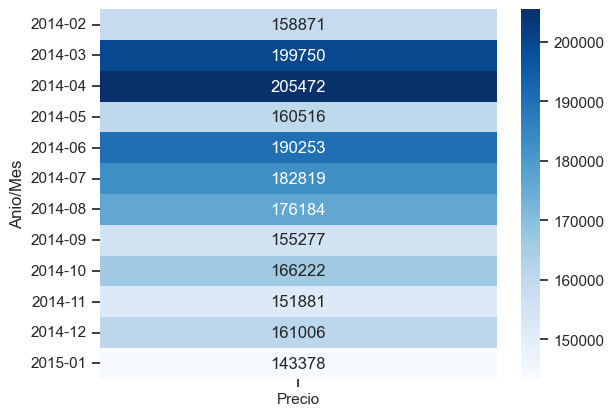

In [7]:
sns.heatmap(seccion1, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Hacemos una gráfica de barras con las ventas de cada mes:

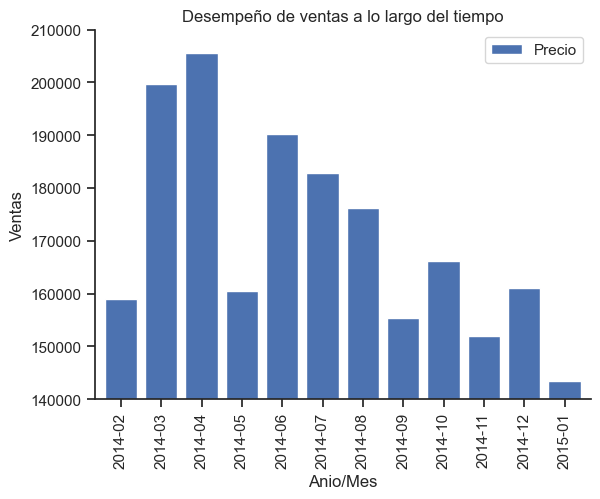

In [8]:
seccion1.plot(kind='bar', ylim=(140000, 210000), ylabel='Ventas', width=0.8, title='Desempeño de ventas a lo largo del tiempo')
plt.show()

__Conclusión:__ los ingresos aumentaron al principio, pero volvieron a bajar a niveles record.

### Sección 2:

Ahora contaremos cuantos productos se sirvieron en cada mes:

In [9]:
df_datos_restaurante.groupby('Anio/Mes').agg({'Producto':'count'})

,Producto
Anio/Mes,
2014-02,2427
2014-03,2879
2014-04,2692
2014-05,2244
2014-06,2580
2014-07,2488
2014-08,2399
2014-09,2467
2014-10,2519


Crearemos un gráfico de calor sobre la cantidad de platos vendidos en cada mes para hacer un análisis exploratorio sencillo:

In [10]:
seccion2 = df_datos_restaurante.groupby('Anio/Mes').agg({'Producto':'count'})

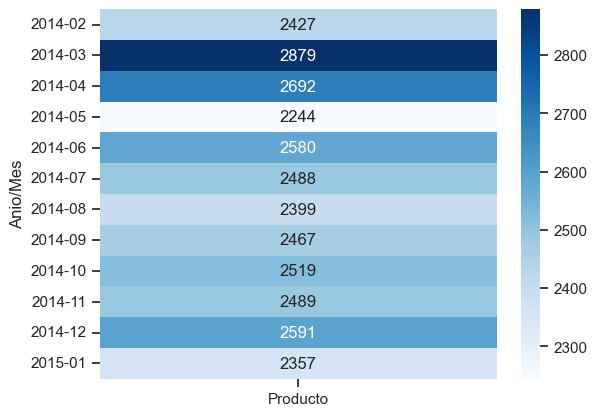

In [11]:
sns.heatmap(seccion2, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Haremos una gráfica de linea con el total de productos servidos por mes:

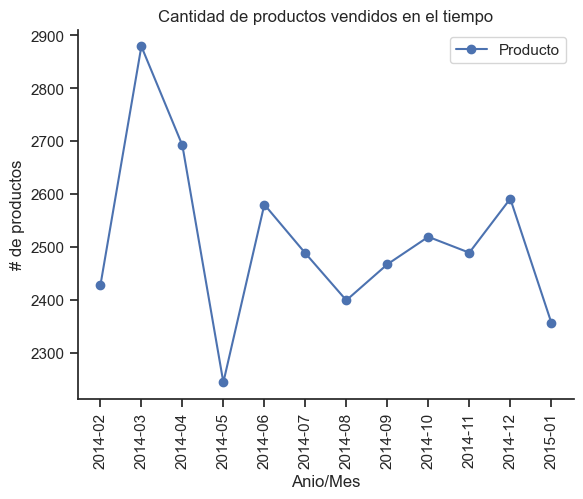

In [13]:
seccion2.plot(kind='line', ylabel='# de productos', title='Cantidad de productos vendidos en el tiempo', marker='o')
plt.xticks(ticks=range(0,12), labels=list(seccion2.index), rotation=90)
plt.show()

__Conclusión:__ los ingresos bajaron, pero la cantidad de productos vendidos se mantuvo en el tiempo

### Sección 3:

Ahora mostraremos los ingresos al mes según si es comida o bebida, para encontrar si hubo un cambio en los habitos de consumo de los clientes:

In [14]:
df_datos_restaurante.pivot_table(index='Anio/Mes', columns='Tipo', values='Precio', aggfunc='sum')

Tipo,Bebida,Comida
Anio/Mes,,
2014-02,48333,110538
2014-03,66787,132963
2014-04,76557,128915
2014-05,56949,103567
2014-06,69512,120741
2014-07,66772,116047
2014-08,65030,111154
2014-09,42485,112792
2014-10,51808,114414


Graficaremos el ingreso mensual de cada tipo de alimento:

In [15]:
seccion3 = df_datos_restaurante.pivot_table(index='Anio/Mes', columns='Tipo', values='Precio', aggfunc='sum')

[]

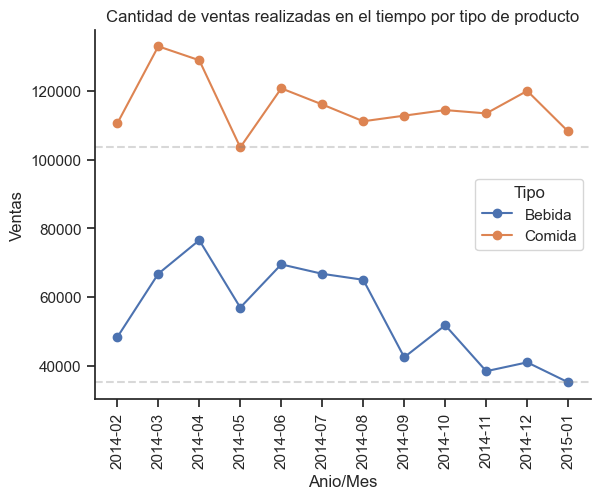

In [41]:
seccion3.plot(kind='line', ylabel='Ventas', marker='o', title='Cantidad de ventas realizadas en el tiempo por tipo de producto')
plt.xticks(ticks=range(0,12), labels=list(seccion3.index), rotation=90)
plt.axhline(y=103567, ls='--', color='gray', alpha=0.3)
plt.axhline(y=35197, ls='--', color='gray', alpha=0.3)
plt.plot()

__Conclusión:__ los clientes piden cada vez menos bebidas, pero la comida se mantiene, por lo que tenemos fuertes indicios que el problema general se da en esa área.

### Sección 4:

Analizaremos el ingreso mensual de las comidas y bebidas, iniciaremos por las comidas ya que en la sección 3 se observa que el principal problema se puede encontran en las bebidas, sin embargo se evalura las comidas para descartar alguna anomalia

### Sección 4.1:

Analizaremos el ingreso mensual de las comidas teniendo una columna por categoría:

In [47]:
df_datos_restaurante[df_datos_restaurante['Tipo'] == 'Comida'].pivot_table(index='Anio/Mes', columns='Categoria', values='Precio', aggfunc='sum')

Categoria,Ensaladas,Entradas,Pastas,Pizzas,Platos Fuertes,Postres,Tacos
Anio/Mes,,,,,,,
2014-02,17483,14294,7781,29005,26907,7553,7515
2014-03,18792,18770,9575,35637,33545,9690,6954
2014-04,16770,18353,8672,35082,35835,6961,7242
2014-05,16402,13546,6829,28894,26681,6643,4572
2014-06,16766,16052,7641,32735,33972,6991,6584
2014-07,16064,16059,7028,31597,29772,8023,7504
2014-08,15342,14867,7327,33132,27908,7483,5095
2014-09,15128,15412,7297,34818,24602,7863,7672
2014-10,16841,16525,7656,30147,29096,8002,6147


Haremos una gráfica de calor sobre los ingresos mensuales de cada tipo de bebida:

In [48]:
seccion4_1=df_datos_restaurante[df_datos_restaurante['Tipo'] == 'Comida'].pivot_table(index='Anio/Mes', columns='Categoria', values='Precio', aggfunc='sum')

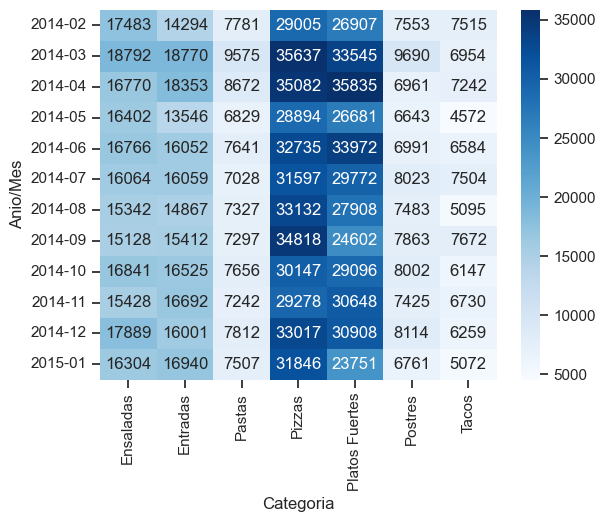

In [49]:
sns.heatmap(data=seccion4_1, annot=True, fmt=".0f", cmap="Blues")
plt.show()

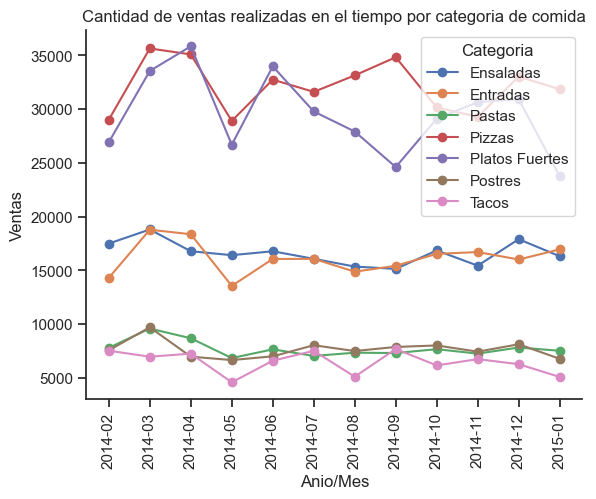

In [50]:
seccion4_1.plot(kind='line',  ylabel='Ventas', marker='o', title='Cantidad de ventas realizadas en el tiempo por categoria de comida')
plt.xticks(ticks=range(0,12), labels=list(seccion3.index), rotation=90)
plt.show()

__Conclusión:__ Los ingresos provenientes de las comidas no variaron mucho, sin embargo la categoria platos fuertes ha disminuido, por lo cual se puede deducir que en las comidas la mayoria de sus categorias se mantienen relativamente estables y no son la causa principal en la disminución de ingresos, por lo cual seguiremos indagando con las bebidas.

### Sección 4.2:

Analizaremos el ingreso mensual de las bebidas teniendo una columna por categoría:

In [18]:
df_datos_restaurante[df_datos_restaurante['Tipo'] == 'Bebida'].pivot_table(index='Anio/Mes', columns='Categoria', values='Precio', aggfunc='sum')

Categoria,Bebida no Alcohol,Cervezas,Vinos
Anio/Mes,,,
2014-02,15377,16145,16811
2014-03,17644,18415,30728
2014-04,16298,17170,43089
2014-05,14994,13480,28475
2014-06,16468,16360,36684
2014-07,15952,15095,35725
2014-08,15135,15155,34740
2014-09,16578,15640,10267
2014-10,16862,15590,19356


Haremos una gráfica de calor sobre los ingresos mensuales de cada tipo de bebida:

In [51]:
seccion4_2 = df_datos_restaurante[df_datos_restaurante['Tipo'] == 'Bebida'].pivot_table(index='Anio/Mes', columns='Categoria', values='Precio', aggfunc='sum')

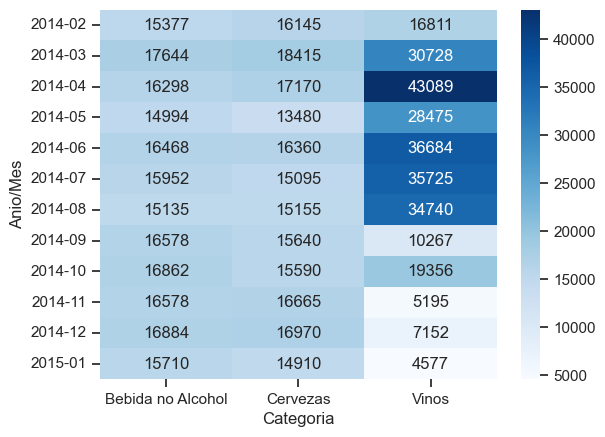

In [52]:
sns.heatmap(data=seccion4_2, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Graficaremos el ingreso mensual de cada tipo de bebida:

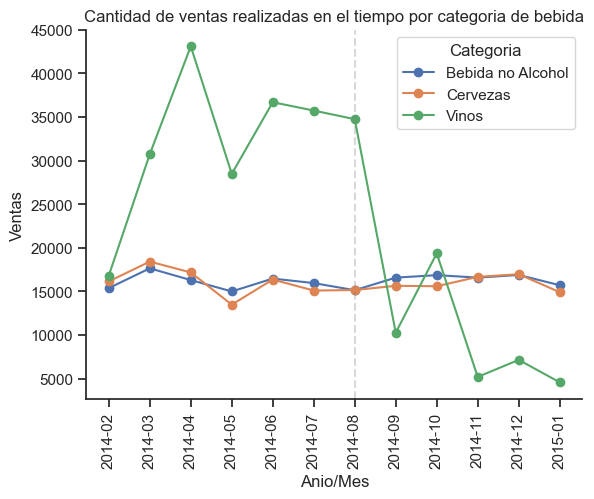

In [160]:
seccion4_2.plot(kind='line',  ylabel='Ventas', marker='o', title='Cantidad de ventas realizadas en el tiempo por categoria de bebida')
plt.xticks(ticks=range(0,12), labels=list(seccion3.index), rotation=90)
plt.axvline(x=6, ls='--', color='gray', alpha=0.3)
plt.show()

__Conclusión:__ Los ingresos provenientes de los vinos bajaron mucho, por lo cual las bebidas son la principales responsables de la disminución de los ingresos. Debemos indagar en los posibles motivos, por ejemplo, analizando a los meseros que lo sirven.

### Sección 5:

Obtendremos las ventas mensuales de cada mesero:

In [66]:
df_datos_restaurante.pivot_table(index='Atendió', columns='Anio/Mes', values='Precio', aggfunc='sum', fill_value=0)

Anio/Mes,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01
Atendió,,,,,,,,,,,,
Alejandro,20750,24185,23956,24446,32116,21030,16371,17756,16555,19786,17254,10229
Ernesto,19666,25380,19234,23593,31995,27139,17814,14853,21821,12258,24581,14302
Joel,20447,29778,30251,21257,18699,34351,27550,10494,25249,11442,12989,11339
Mariana,29480,19581,21450,9166,29611,17133,23007,14024,12674,17772,17662,14542
Mauricio,0,0,0,0,0,0,0,30381,34959,29455,31190,36568
Omar,18076,30387,32231,21130,18446,11062,30738,20637,9201,13314,18235,18624
Rodolfo,23115,21735,34651,24874,18263,15017,18580,18284,15056,17818,15438,6713
Saul,7260,22947,26459,13454,23672,33827,24178,14109,16795,15374,11084,17862
Valentina,20077,25757,17240,22596,17451,23260,17946,14739,13912,14662,12573,13199


Haremos una gráfica de calor sobre las ventas de cada mesero:

In [64]:
seccion5 = df_datos_restaurante.pivot_table(index='Atendió', columns='Anio/Mes', values='Precio', aggfunc='sum', fill_value=0)

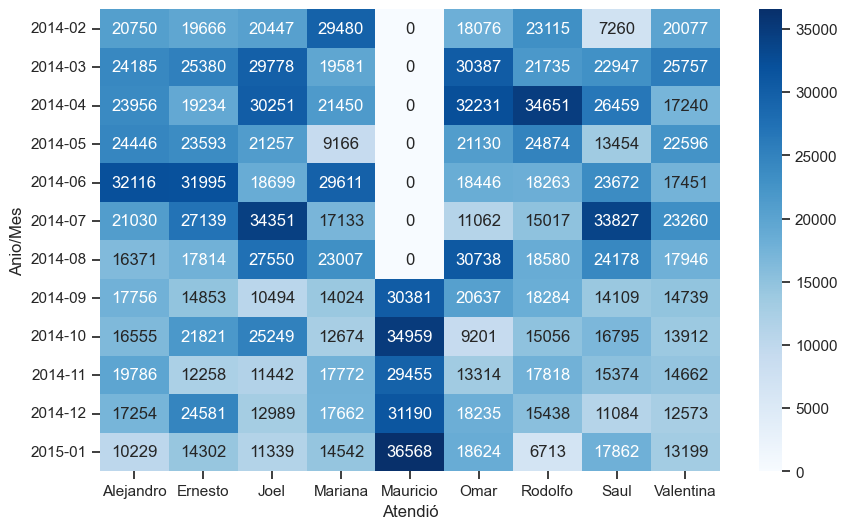

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(data=seccion5.T, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Graficaremos el ingreso por mes de cada mesero:

In [72]:
df_datos_restaurante[['Anio/Mes', 'Atendió', 'Precio']].groupby(['Anio/Mes', 'Atendió']).sum().reset_index()

,Anio/Mes,Atendió,Precio
0,2014-02,Alejandro,20750
1,2014-02,Ernesto,19666
2,2014-02,Joel,20447
3,2014-02,Mariana,29480
4,2014-02,Omar,18076
...,...,...,...
96,2015-01,Mauricio,36568
97,2015-01,Omar,18624
98,2015-01,Rodolfo,6713
99,2015-01,Saul,17862


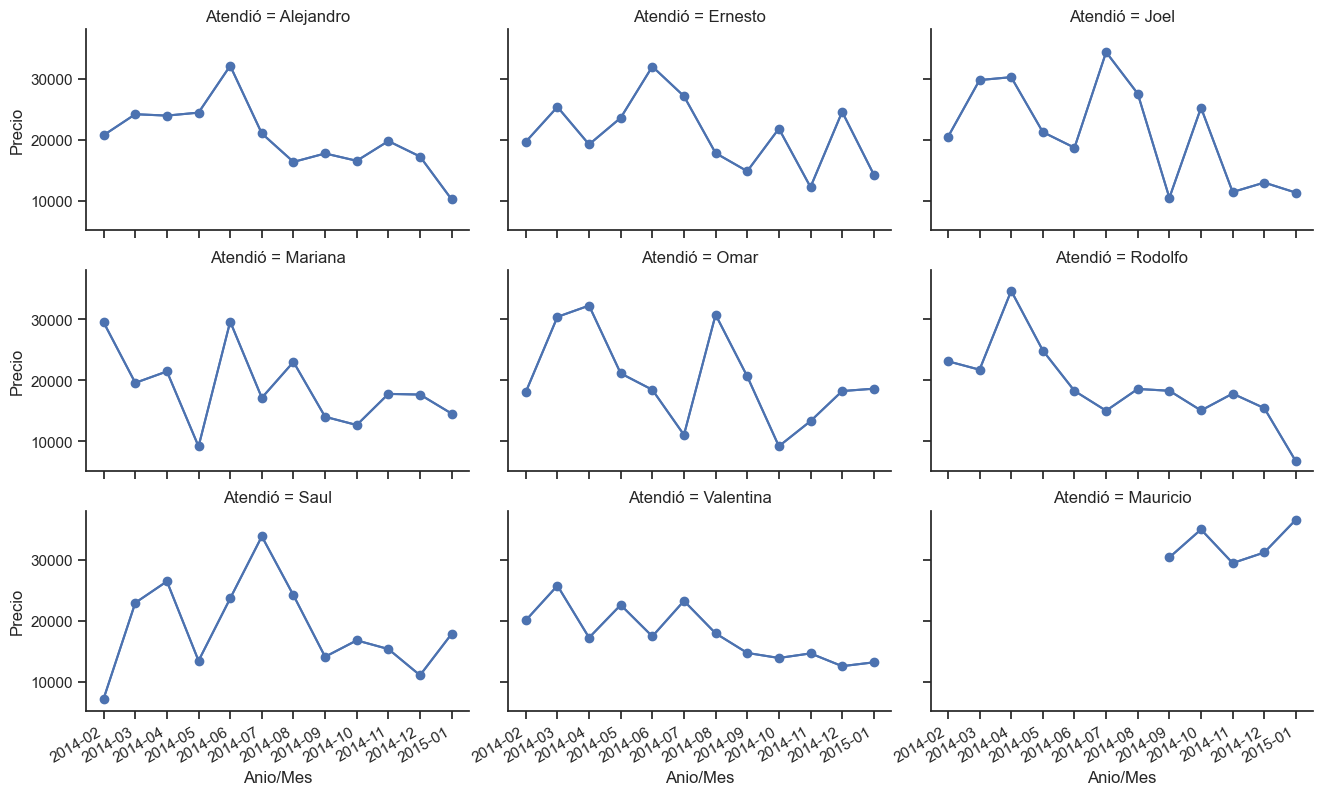

In [97]:
seccion5_1 = df_datos_restaurante.pivot_table(index=['Anio/Mes', 'Atendió'], values='Precio', aggfunc='sum', fill_value=0).reset_index()
g = sns.relplot(data=seccion5_1, x='Anio/Mes', y='Precio', col='Atendió', kind='line', col_wrap=3, height=3, aspect=1.5)
g.map(plt.plot, 'Anio/Mes', 'Precio', marker='o')
g.fig.autofmt_xdate()
plt.show()

__Conclusión:__ las ventas de los meseros al igual que el vino están bajando, excepto por Mauricio que entró a trabajar en septiembre, un buen paso será graficar la relación de estas 2 variables, por ejemplo, calcular cuanto vino vende cada mesero

### Sección 6:

Averiguaremos cuanto vino vende cada mesero:

In [104]:
df_datos_restaurante[df_datos_restaurante['Categoria'] == 'Vinos'].pivot_table(index='Atendió', values='Precio', aggfunc='sum').sort_values('Precio', ascending=False)

,Precio
Atendió,
Alejandro,45957
Joel,43333
Ernesto,38776
Saul,35019
Omar,31078
Valentina,27153
Rodolfo,26233
Mariana,25250


Hacemos un análisis exploratorio con una gráfica de calor:

In [105]:
seccion6 = df_datos_restaurante[df_datos_restaurante['Categoria'] == 'Vinos'].pivot_table(index='Atendió', values='Precio', aggfunc='sum').sort_values('Precio', ascending=False)

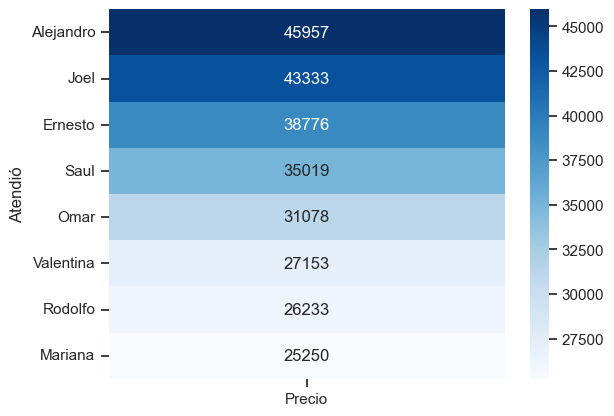

In [107]:
sns.heatmap(seccion6, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Graficamos la venta de vinos de cada mesero:

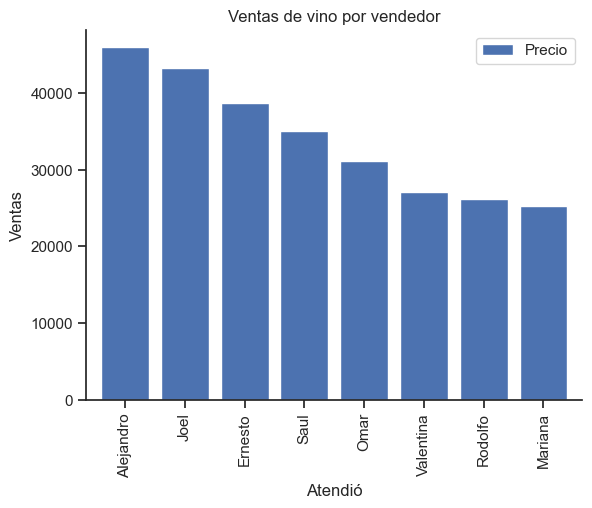

In [109]:
seccion6.plot(kind='bar', ylabel='Ventas', width=0.8, title='Ventas de vino por vendedor')
plt.show()

__Conclusión:__ en la gráfica anterior notamos que no aparece Mauricio, por lo que el descenso en ingresos puede deberse a esto

### Sección 7:

Para poder conocer si los meseros atienden bien utilizaremos una cantidad derivada, la propina, si reciben buenas propinas es aceptable pensar que es por su buen servicio:

In [112]:
df_datos_restaurante.pivot_table(index='Atendió', values='Propina', aggfunc='mean').sort_values('Propina', ascending=False)

,Propina
Atendió,
Mauricio,0.200000
Saul,0.112254
Omar,0.111976
Joel,0.111800
Ernesto,0.111613
Mariana,0.109825
Alejandro,0.107915
Rodolfo,0.107440
Valentina,0.105980


Haremos un analisis exploratorio de los datos con una gráfica de calor:

In [113]:
seccion7 = df_datos_restaurante.pivot_table(index='Atendió', values='Propina', aggfunc='mean').sort_values('Propina', ascending=False)

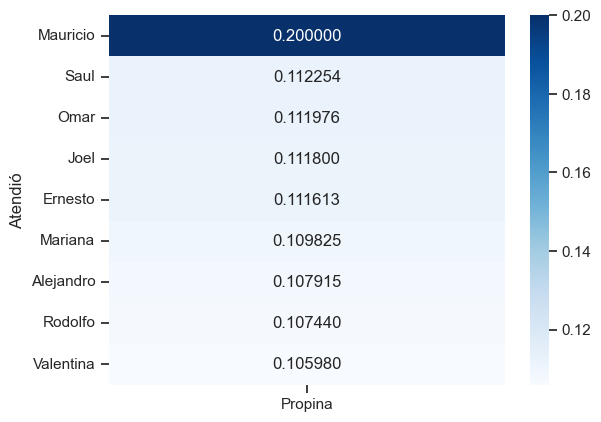

In [118]:
sns.heatmap(data=seccion7, annot=True, fmt=".6f", cmap="Blues")
plt.show()

Graficamos la propina media de cada mesero:

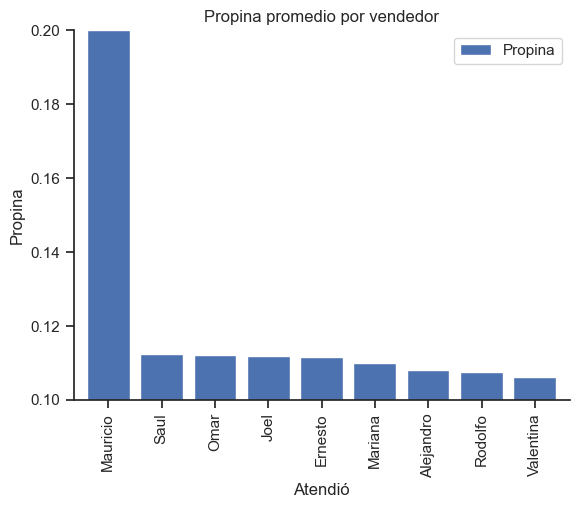

In [182]:
seccion7.plot(kind='bar', ylabel='Propina', width=0.8, title='Propina promedio por vendedor', ylim=(0.100,0.2))
plt.show()

__Conclusión:__ todos los meseros tienen propinas similares, a excepción de Mauricio, por lo que debemos analizar la cantidad de clientes que vuelven a comprar con nosotros, en especial después de septiembre.

### Sección 8:

Analizaremos la cantidad de clientes nuevos contra los que regresan:

In [129]:
df_datos_restaurante.pivot_table(index='Anio/Mes', columns='Tipo de Cliente', values='Precio', aggfunc='sum')

Tipo de Cliente,Cliente Nuevo,Cliente Repetido
Anio/Mes,,
2014-02,108372,50499
2014-03,134946,64804
2014-04,133901,71571
2014-05,102307,58209
2014-06,129283,60970
2014-07,126675,56144
2014-08,120012,56172
2014-09,123245,32032
2014-10,122539,43683


Haremos una gráfica de calor sobre las ventas al mes por tipo de cliente:

In [130]:
seccion8 = df_datos_restaurante.pivot_table(index='Anio/Mes', columns='Tipo de Cliente', values='Precio', aggfunc='sum')

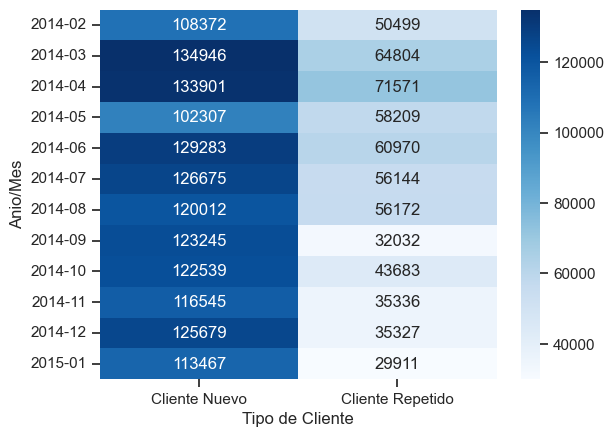

In [132]:
sns.heatmap(data=seccion8, annot=True, fmt=".0f", cmap="Blues")
plt.show()

Graficaremos las ventas al mes por tipo de cliente:

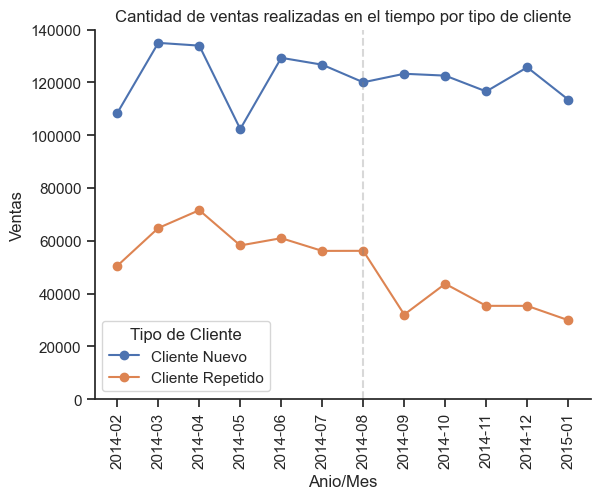

In [159]:
#seccion8.plot(kind='line', subplots=True, ylabel='Ventas', title='Cantidad de ventas realizadas en el tiempo por tipo de cliente', marker='o', ylim=(0,140000), figsize=(12,4), layout=(1,2))
seccion8.plot(kind='line', ylabel='Ventas', title='Cantidad de ventas realizadas en el tiempo por tipo de cliente', marker='o', ylim=(0,140000))
plt.xticks(ticks=range(0,12), labels=list(seccion8.index), rotation=90)
plt.axvline(x=6, ls='--', color='gray', alpha=0.3)
plt.show()

__Conclusión:__ los clientes deciden no volver a comer con nosotros, analizaremos el impacto de este hecho en la venta de vino.

### Sección 9:

Analizaremos la venta de vinos según el tipo de cliente:

In [127]:
df_datos_restaurante[df_datos_restaurante['Categoria'] == 'Vinos'].pivot_table(index='Anio/Mes', columns='Tipo de Cliente', values='Precio', aggfunc='sum')

Tipo de Cliente,Cliente Nuevo,Cliente Repetido
Anio/Mes,,
2014-02,3168,13643
2014-03,9389,21339
2014-04,25433,17656
2014-05,9095,19380
2014-06,17222,19462
2014-07,18964,16761
2014-08,16574,18166
2014-09,9552,715
2014-10,8372,10984


Haremos una gráfica de calor las ventas de vino al mes por tipo de cliente:

In [128]:
seccion9 = df_datos_restaurante[df_datos_restaurante['Categoria'] == 'Vinos'].pivot_table(index='Anio/Mes', columns='Tipo de Cliente', values='Precio', aggfunc='sum')

[]

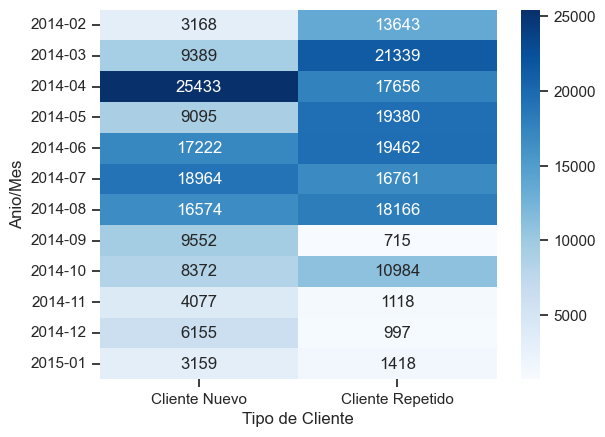

In [150]:
sns.heatmap(data=seccion9, annot=True, fmt=".0f", cmap="Blues")
plt.plot()

Graficaremos las ventas de vino al mes por tipo de cliente:

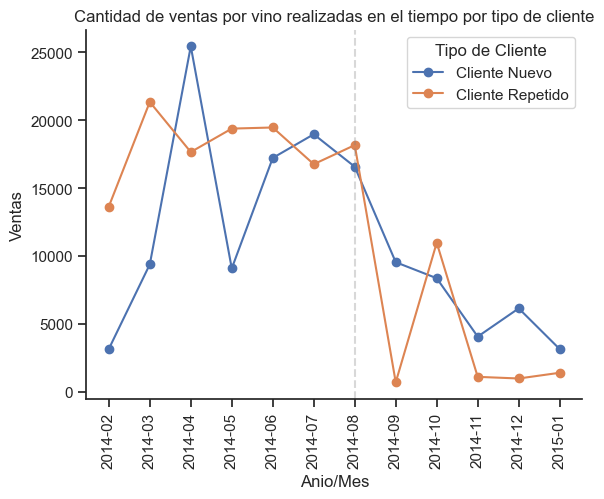

In [161]:
seccion9.plot(kind='line', ylabel='Ventas', title='Cantidad de ventas por vino realizadas en el tiempo por tipo de cliente', marker='o')
plt.xticks(ticks=range(0,12), labels=list(seccion9.index), rotation=90)
plt.axvline(x=6, ls='--', color='gray', alpha=0.3)
plt.show()

__Conclusión:__ la venta de vino en los clientes nuevos se mantuvo, pero en los repetidos ha descendido, en especial desde septiembre, debemos investigar la venta de cada mesero separado por tipo de cliente.

### Sección 10:

Analizar la venta de cada mesero en base al tipo de cliente:

In [164]:
df_datos_restaurante.pivot_table(index='Atendió', columns='Tipo de Cliente', values='Precio', aggfunc='sum', fill_value=0)

Tipo de Cliente,Cliente Nuevo,Cliente Repetido
Atendió,,
Alejandro,155952,88482
Ernesto,170101,82535
Joel,188364,65482
Mariana,152285,73817
Mauricio,162553,0
Omar,152538,89543
Rodolfo,163057,66487
Saul,165294,61727
Valentina,146827,66585


Para analizar mejor el trato que le dan a los clientes por tipo, transformaremos sus ventas a porcentajes:

In [178]:
porcentaje_por_tipo_cliente = df_datos_restaurante.pivot_table(index='Atendió', columns='Tipo de Cliente', values='Precio', aggfunc='sum', fill_value=0)
porcentaje_por_tipo_cliente['Total'] = porcentaje_por_tipo_cliente['Cliente Nuevo'] + porcentaje_por_tipo_cliente['Cliente Repetido']
porcentaje_por_tipo_cliente['% Nuevo'] = (porcentaje_por_tipo_cliente['Cliente Nuevo'] / porcentaje_por_tipo_cliente['Total']) * 100
porcentaje_por_tipo_cliente['% Repetido'] = (porcentaje_por_tipo_cliente['Cliente Repetido'] / porcentaje_por_tipo_cliente['Total']) * 100
porcentaje_por_tipo_cliente

Tipo de Cliente,Cliente Nuevo,Cliente Repetido,Total,% Nuevo,% Repetido
Atendió,,,,,
Alejandro,155952,88482,244434,63.801272,36.198728
Ernesto,170101,82535,252636,67.330468,32.669532
Joel,188364,65482,253846,74.204045,25.795955
Mariana,152285,73817,226102,67.352345,32.647655
Mauricio,162553,0,162553,100.000000,0.000000
Omar,152538,89543,242081,63.011141,36.988859
Rodolfo,163057,66487,229544,71.035183,28.964817
Saul,165294,61727,227021,72.810004,27.189996
Valentina,146827,66585,213412,68.799786,31.200214


Haremos un análisis exploratorio de los datos con un mapa de calor:

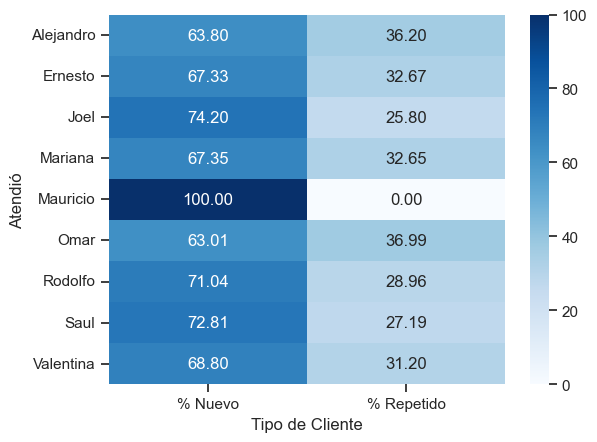

In [179]:
sns.heatmap(data=porcentaje_por_tipo_cliente[['% Nuevo', '% Repetido']], annot=True, fmt='0.2f', cmap="Blues")
plt.show()

Y finalmente graficaremos las ventas al mes de cada mesero por tipo de cliente:

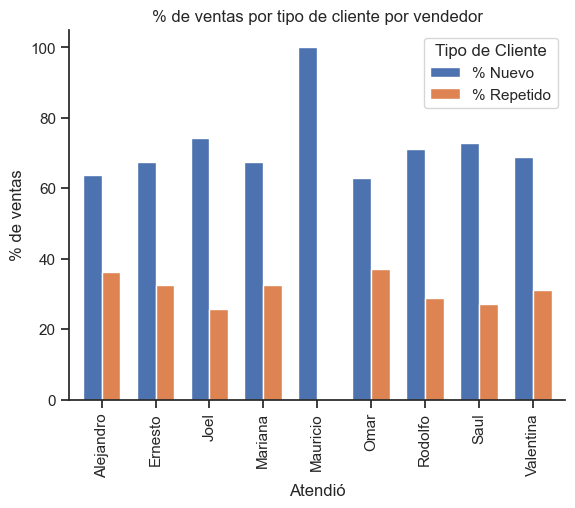

In [184]:
porcentaje_por_tipo_cliente[['% Nuevo', '% Repetido']].plot(kind='bar', ylabel='% de ventas', title='% de ventas por tipo de cliente por vendedor', width=0.7)
plt.show()

__Conclusión:__ Mauricio no atiende clientes repetidos.

__Conlusión General:__ Los clientes repetidos son los que más vino consumían, al dejar de regresar nuestros ingresos disminuyeron, nuestro principal sospechoso es Mauricio por tener unas propinas anormalmente altas, pero pese a ello los clientes no quieren volver a ser atendidos por el.

Tras hacer una investigación presencial encontramos que la manera en la que Mauricio atendía era grosera y exigia a los comensales consumir más y cargaba propina sin avisar, por eso sus ventas eran altas, pero ahuyentaba a los clientes.